1. 本文介绍如何将nc文件切片然后保存为一个tiff文件;
2. 本质上要分享的是如何将一个numpy数据矩阵保存为一个tiff文件。

## 加载包

In [6]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import matplotlib.pyplot as plt

import rasterio

In [13]:
nc_data = nc.Dataset("./数据集/cru_ts4.05.1901.2020.tmp.dat.nc")
print(nc_data.variables['tmp'])

<ipython-input-13-a1cca672088d>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_tmp_data = np.array(nc_data.variables['tmp'])


In [31]:
raw_tmp_data = np.array(nc_data.variables['tmp'])
tmp_missing_value = nc_data.variables['tmp'].missing_value

<ipython-input-31-2e0fc16a3f19>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  raw_tmp_data = np.array(nc_data.variables['tmp'])


In [32]:
tmp_missing_value

9.96921e+36

In [33]:
# 切片
matrix1 = raw_tmp_data[0, :, :][::-1, :]

In [34]:
## 替换缺失值
matrix1[matrix1 == tmp_missing_value] = np.nan

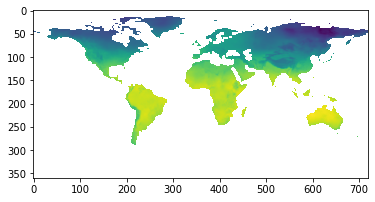

In [35]:
fig, ax = plt.subplots()
ax.imshow(matrix1)


In [29]:
def array2gtiff(array, filename):
    """
    将一个矩阵保存为tiff文件,
    这里还可以设置tiff的crs和transofrm。更多，可以查看rasterio的官网或者下面的这个链接
    https://gis.stackexchange.com/questions/279953/numpy-array-to-gtiff-using-rasterio-without-source-raster
    :param array: shape:(row, col)
    :param filename:
    :return:
    """
    with rasterio.open(filename, 'w', driver='GTiff',
                       height=array.shape[0], width=array.shape[1],
                       count=1, dtype=str(array.dtype)) as f:
        f.write(array, 1)

# test function
array2gtiff(array=matrix1, filename="结果/test001.tiff")

/opt/anaconda3/envs/devc/lib/python3.8/site-packages/rasterio/__init__.py:230: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = writer(path, mode, driver=driver,
